## Load MNIST Dataset for Visualization

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

(train_ds, train_label), (test_ds, test_label) = tfds.load('mnist', split=['train', 'test'],
                                         with_info=True, as_supervised=True,
                                         batch_size=-1)[0]

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


## Convert to Dataframes to use within scikit-learn models

In [2]:
import pandas as pd
import numpy as np

# Convert TensorFlow datasets to NumPy arrays
train_ds_numpy = train_ds.numpy()
train_label_numpy = train_label.numpy()
test_ds_numpy = test_ds.numpy()
test_label_numpy = test_label.numpy()

# Reshape the datasets to have one row per image
train_ds_numpy = np.reshape(train_ds_numpy, (train_ds_numpy.shape[0], -1))
test_ds_numpy = np.reshape(test_ds_numpy, (test_ds_numpy.shape[0], -1))

# Create labeled columns
train_columns = ['pixel' + str(i) for i in range(1, train_ds_numpy.shape[1] + 1)]
test_columns = ['pixel' + str(i) for i in range(1, test_ds_numpy.shape[1] + 1)]

# Add labels column
train_columns.append('label')
test_columns.append('label')

# Concatenate datasets with labels
train_data = np.column_stack((train_ds_numpy, train_label_numpy))
test_data = np.column_stack((test_ds_numpy, test_label_numpy))

train_df = pd.DataFrame(train_data, columns=train_columns)
test_df = pd.DataFrame(test_data, columns=test_columns)

In [3]:
train_df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8


In [4]:
test_df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7


## Data Visualization

### Visualize 9 digits from the training datasets

- Plotting all 784 pixels into 9 (28x28) square images representing the first 9 digits

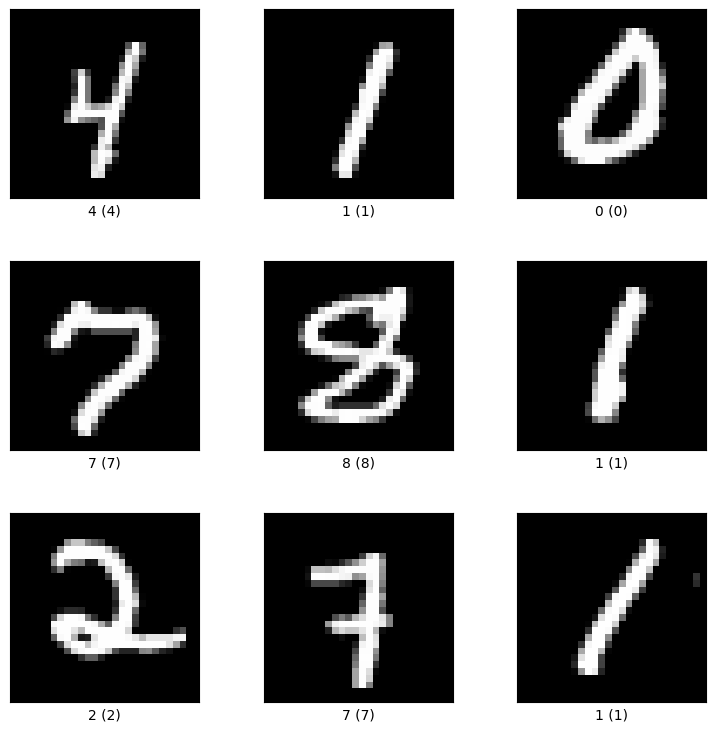

In [5]:
(train_tfds, test_tfds), tfds_info = tfds.load('mnist', split=['train', 'test'],
                                         with_info=True, as_supervised=True)
fig = tfds.show_examples(train_tfds, tfds_info)

### Visualize Digit Distribution Across Test & Training Datasets

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

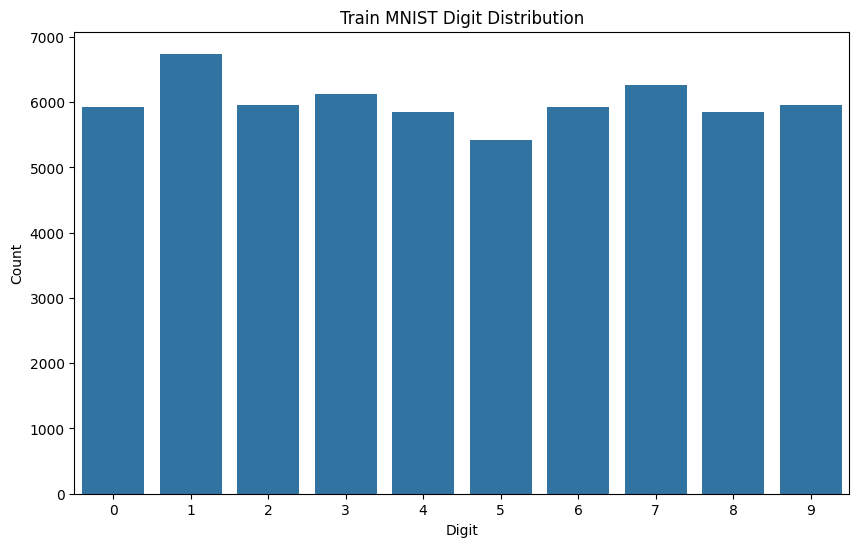

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=train_df)
plt.title('Train MNIST Digit Distribution')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.show()

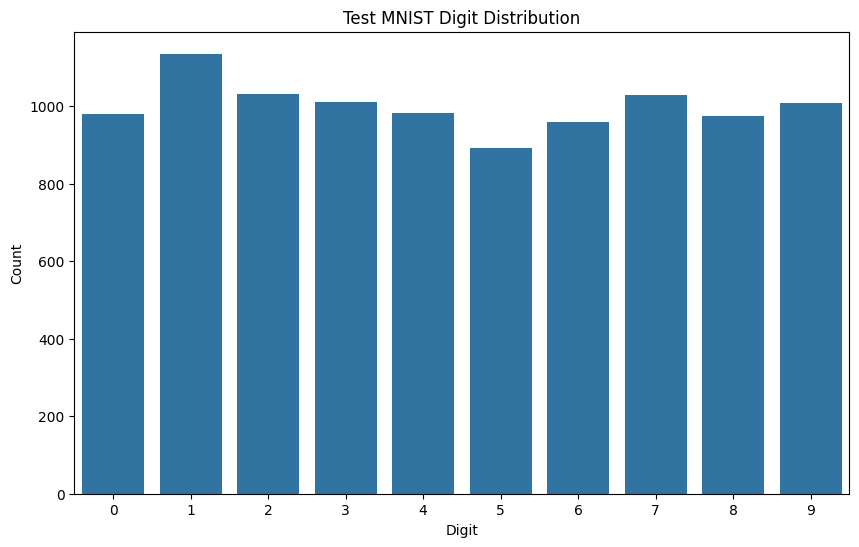

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=test_df)
plt.title('Test MNIST Digit Distribution')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.show()

## Split Up Data into Training & Test

The data is already split up by the initial authors of the seminal paper, where training and testing data seems to be evenly distributed and there are 60,000 samples for trianing & 10,000 samples for testing. Therefore, this would mean the test size is 14%, and the train size would approximately be 86%.

## Preprocess Data (Pixel Value Normalization)

Each pixel is either shades of black or white, which ranges from 0 to 255.
We will normalize these pixel values between 0 or 1 by dividing each pixel value by 255.

In [4]:
X_train = train_df.drop(columns=['label'])
y_train = train_df['label']

X_test = test_df.drop(columns=['label'])
y_test = test_df['label']

X_train = X_train / 255.0
X_test = X_test / 255.0

# Initial Naive Classification Approaches

The following approaches are naive because each of these models were first built with arbitrarily selected parameters based on previous experience with building models on other datasets. If the initial performance is well, then we pursue hyperparameter training.

- Logistic Regression Classifier
- Naive Bayes Classifier
- Decision Trees Classifier
- K-Nearest Neighbors Classifier
- Support Vector Machines Classifier

## Initial Model Development

- Models are built with arbitrary parameters based on prior experience with building models.

In [5]:
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
from sklearn.metrics import accuracy_score

In [7]:
def cm_viz(y_test, y_pred):
  # Calculate the confusion matrix
  cm = confusion_matrix(y_test, y_pred)

  # Plot the confusion matrix
  plt.figure(figsize=(10, 8))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
  plt.xlabel('Predicted labels')
  plt.ylabel('True labels')
  plt.title('Confusion Matrix')
  plt.show()

  return cm

### Logistic Regression Classifier

In [11]:
from sklearn.linear_model import LogisticRegression


# Initialize Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the training data
logistic_model.fit(X_train, y_train)

# Predict labels for test data
lr_y_pred = logistic_model.predict(X_test)

# Calculate accuracy
lr_accuracy = accuracy_score(y_test, lr_y_pred)
print("Accuracy:", lr_accuracy)

Accuracy: 0.9256


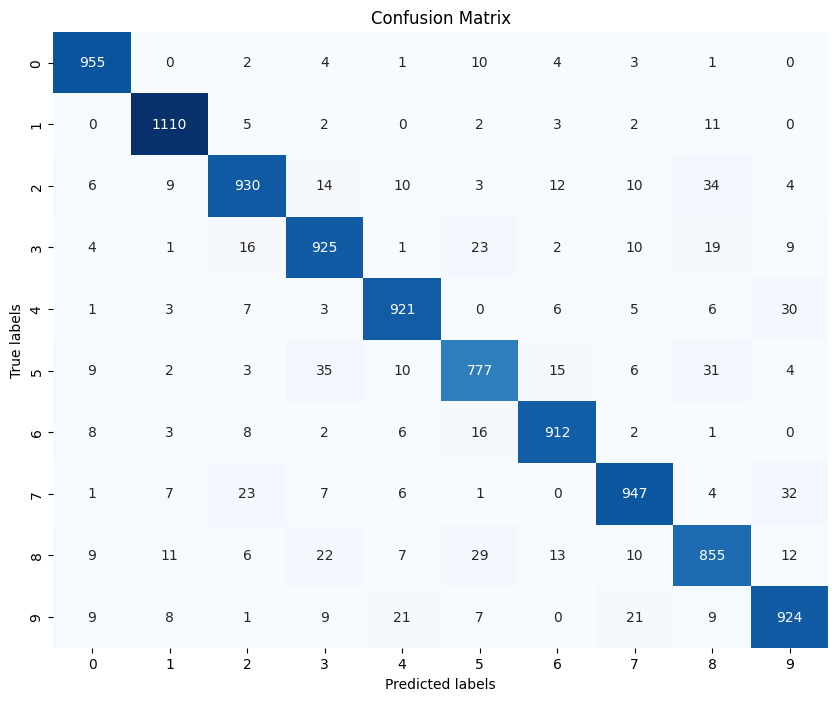

In [12]:
lr_cm = cm_viz(y_test, lr_y_pred)

In [13]:
lr_cr = classification_report(y_test, lr_y_pred)
print(lr_cr)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.92      0.91      1010
           4       0.94      0.94      0.94       982
           5       0.90      0.87      0.88       892
           6       0.94      0.95      0.95       958
           7       0.93      0.92      0.93      1028
           8       0.88      0.88      0.88       974
           9       0.91      0.92      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



#### Optimizing Logistic Regression Classifier

Attempt at running took 2 hours with no results.

Best implementation by atmamani: https://atmamani.github.io/projects/ml/mnist-digits-classification-using-logistic-regression-scikit-learn/


In [ ]:
# Commented out as took too long to run
# lm_op = LogisticRegression(fit_intercept=True,
#                         multi_class='auto',
#                         penalty='l2', #ridge regression
#                         solver='saga',
#                         max_iter=10000,
#                         C=50)

# # Train the model on the training data
# lm_op.fit(X_train, y_train)

# # Predict labels for test data
# lm_op_y_pred = lm_op.predict(X_test)

# # Calculate accuracy
# lm_op_accuracy = accuracy_score(y_test, lm_op_y_pred)
# print("Accuracy:", lm_op_accuracy)

##### NVIDIA GPU Acceleration Attempt

In [8]:
!nvidia-smi

Tue Apr 30 03:41:57 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P0              50W / 400W |    425MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [9]:
# This get the RAPIDS-Colab install files and test check your GPU.  Run this and the next cell only.
# Please read the output of this cell.  If your Colab Instance is not RAPIDS compatible, it will warn you and give you remediation steps.
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/pip-install.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 476, done.
remote: Counting objects: 100% (207/207), done.
remote: Compressing objects: 100% (116/116), done.
remote: Total 476 (delta 141), reused 124 (delta 91), pack-reused 269
Receiving objects: 100% (476/476), 131.59 KiB | 239.00 KiB/s, done.
Resolving deltas: 100% (243/243), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 1.6 MB/s eta 0:00:00
***********************************************************************
Woo! Your instance has a NVIDIA A100-SXM4-40GB GPU!
We will install the latest stable RAPIDS via pip 24.4.*!  Please stand by, should be quick...
***********************************************************************

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 473.3/473.3 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 GB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [10]:
import cudf
cudf.__version__

'24.04.00'

In [11]:
import cuml
cuml.__version__

'24.04.00'

In [12]:
import cugraph
cugraph.__version__

'24.04.00'

In [13]:
import cuspatial
cuspatial.__version__

'24.04.00'

In [14]:
import cuxfilter
cuxfilter.__version__

'24.04.01'

In [15]:
import cudf
import cuml

# Convert features and labels to cuDF DataFrames
X_train_cudf = cudf.DataFrame(X_train)
y_train_cudf = cudf.DataFrame(y_train)
X_test_cudf = cudf.DataFrame(X_test)
y_test_cudf = cudf.DataFrame(y_test)

In [22]:
from cuml.linear_model import LogisticRegression

# Initialize and train cuML logistic regression model
# Saga solver is not supported
# Default uses L2 regularization
model = LogisticRegression(C=50, max_iter=10000, random_state=42)
model.fit(X_train_cudf, y_train_cudf)

# Predict labels for test data
y_pred = model.predict(X_test_cudf)

[I] [02:19:00.165256] Unused keyword parameter: random_state during cuML estimator initialization


In [23]:
# Calculate accuracy
gpu_lr_acc = accuracy_score(y_test, y_pred.to_numpy())
print("Accuracy:", gpu_lr_acc)

Accuracy: 0.9219


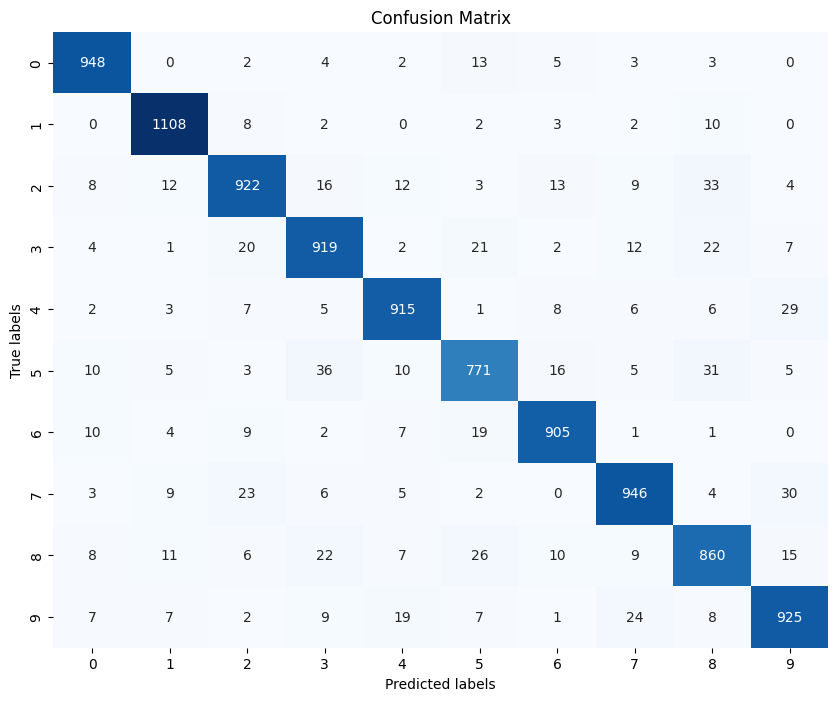

In [24]:
gpu_lr_cm = cm_viz(y_test, y_pred.to_numpy())

In [25]:
lr_cr = classification_report(y_test, y_pred.to_numpy())
print(lr_cr)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.92      0.89      0.91      1032
           3       0.90      0.91      0.90      1010
           4       0.93      0.93      0.93       982
           5       0.89      0.86      0.88       892
           6       0.94      0.94      0.94       958
           7       0.93      0.92      0.93      1028
           8       0.88      0.88      0.88       974
           9       0.91      0.92      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



### Gaussian Naive Bayes Classifier

There are no hyperparamters / parameters to tune.
Multinomial as there are 10 classes.

In [26]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

nb.fit(X_train, y_train)

nb_pred = nb.predict(X_test)

# Calculate accuracy
nb_acc = accuracy_score(y_test, nb_pred)
print("Accuracy:", nb_acc)

Accuracy: 0.8357


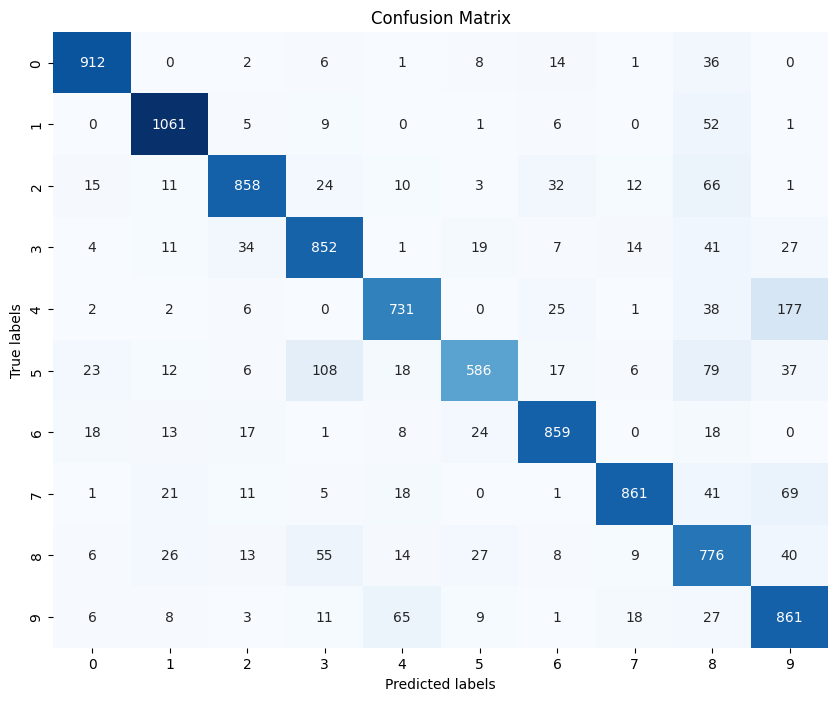

In [27]:
nb_cm = cm_viz(y_test, nb_pred)

In [28]:
nb_cr = classification_report(y_test, nb_pred)
print(nb_cr)

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       980
           1       0.91      0.93      0.92      1135
           2       0.90      0.83      0.86      1032
           3       0.80      0.84      0.82      1010
           4       0.84      0.74      0.79       982
           5       0.87      0.66      0.75       892
           6       0.89      0.90      0.89       958
           7       0.93      0.84      0.88      1028
           8       0.66      0.80      0.72       974
           9       0.71      0.85      0.77      1009

    accuracy                           0.84     10000
   macro avg       0.84      0.83      0.83     10000
weighted avg       0.84      0.84      0.84     10000



### Decision Tree Classifier

In [29]:
from sklearn.tree import DecisionTreeClassifier

# Baseline Model
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# Calculate accuracy
dt_acc = accuracy_score(y_test, dt_pred)
print("Accuracy:", dt_acc)

Accuracy: 0.8663


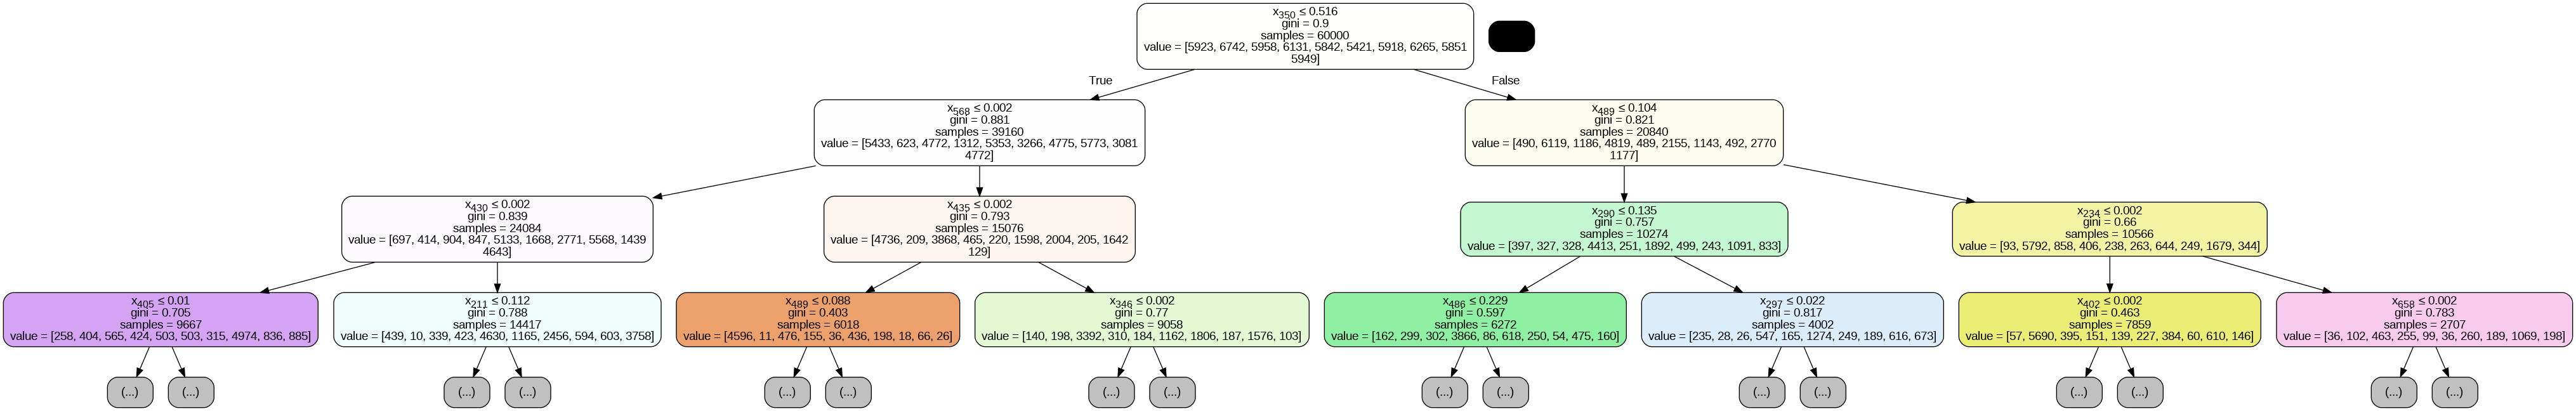

In [30]:
from io import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

# Convert Decision Tree to visualization
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                max_depth=3)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Create PNG file
Image(graph.create_png())

A single decision tree is unequipped to handle 784 features, which is why I apply t-SNE to reduce all 784 features (pixels) down to 2 t-SNE features. However, before applying t-SNE, I use TSVD (Truncated Singular Value Decomposition) because it is better applied for compressing sparse data. Only a few of the pixels are lit up to represent a number. PCA is better for dense data when it comes to dimensionality reduction.

We are going to use GPU Accelerated Code here, as it takes too long without for tSNE.

In [ ]:
# CPU BASED IMPLEMENTATION
# from sklearn.decomposition import TruncatedSVD
# from sklearn.manifold import TSNE
# # Perform Truncated Singular Value Decomposition (TSVD) on all features
# # This will reduce the amount of features to 50 and will simplify t-SNE

# # Concatenate X_train_df and X_test_df
# X_combined_df = pd.concat([X_train, X_test], axis=0, ignore_index=True)
# y_combined = pd.concat([y_train, y_test], axis=0, ignore_index=True)

# tsvd = TruncatedSVD(n_components=50).fit_transform(X_combined_df)

# # Split up the t-SNE results in training and testing data
# tsvd_cols = [f'component_{i+1}' for i in range(50)]
# tsvd_train = pd.DataFrame(tsvd[:len(train_df)], columns=[tsvd_cols])
# tsvd_test = pd.DataFrame(tsvd[len(train_df):], columns=[tsvd_cols])

# # Train model with t-svd features
# tsvd_dt = DecisionTreeClassifier(max_depth=10, random_state=42)
# tsvd_dt.fit(tsvd_train, y_train)
# tsvd_dt_pred = tsvd_dt.predict(tsvd_test)

# # Calculate accuracy
# tsvd_dt_acc = accuracy_score(y_test, tsvd_dt_pred)
# print("Accuracy:", tsvd_dt_acc)

# # Fit t-SNE on the Truncated SVD reduced data (50 features)
# tsne = TSNE()
# transformed = tsne.fit_transform(tsvd)

# # Split up the t-SNE results in training and testing data
# tsne_train = pd.DataFrame(transformed[:len(train_df)], columns=['component1', 'component2'])
# tsne_test = pd.DataFrame(transformed[len(train_df):], columns=['component1', 'component2'])

In [31]:
# GPU Based Dimensionality Reduction
X_combined_cudf = cudf.concat([X_train_cudf, X_test_cudf], axis=0, ignore_index=True)
y_combined_cudf = cudf.concat([y_train_cudf, y_test_cudf], axis=0, ignore_index=True)

In [32]:
from cuml.decomposition import TruncatedSVD
tsvd = TruncatedSVD(n_components=50).fit_transform(X_combined_cudf)

In [33]:
import pandas as pd

# Split up the t-SNE results in training and testing data
tsvd_cols = [f'component_{i+1}' for i in range(50)]
tsvd_train = pd.DataFrame(tsvd.to_numpy()[:len(X_train_cudf)], columns=[tsvd_cols])
tsvd_test = pd.DataFrame(tsvd.to_numpy()[len(X_train_cudf):], columns=[tsvd_cols])

In [34]:
tsvd_dt = DecisionTreeClassifier(max_depth=10, random_state=42)
tsvd_dt.fit(tsvd_train, y_train)
tsvd_dt_pred = tsvd_dt.predict(tsvd_test)

# Calculate accuracy
tsvd_dt_acc = accuracy_score(y_test, tsvd_dt_pred)
print("Accuracy:", tsvd_dt_acc)

Accuracy: 0.8026


In [35]:
from cuml.manifold import TSNE

# Initialize and fit t-SNE model
tsne = TSNE(n_components=2, perplexity=30, learning_rate=100)
tsne_embedding = tsne.fit_transform(tsvd)

/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/usr/local/lib/python3.10/dist-packages/cupy/cuda/compiler.py:233: PerformanceWarning: Jitify is performing a one-time only warm-up to populate the persistent cache, this may take a few seconds and will be improved in a future release...
  jitify._init_module()


[W] [02:22:02.487412] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


In [36]:
# Split up the t-SNE results in training and testing data
tsne_train = pd.DataFrame(tsne_embedding.to_numpy()[:len(train_df)], columns=['component1', 'component2'])
tsne_test = pd.DataFrame(tsne_embedding.to_numpy()[len(train_df):], columns=['component1', 'component2'])

In [37]:
# Concatenate the t-SNE embeddings with the labels from the original DataFrame
tsne_trainviz_df = pd.DataFrame(tsne_embedding.to_numpy()[:len(train_df)], columns=['component1', 'component2'])
tsne_trainviz_df['label'] = train_df['label'].astype('int')

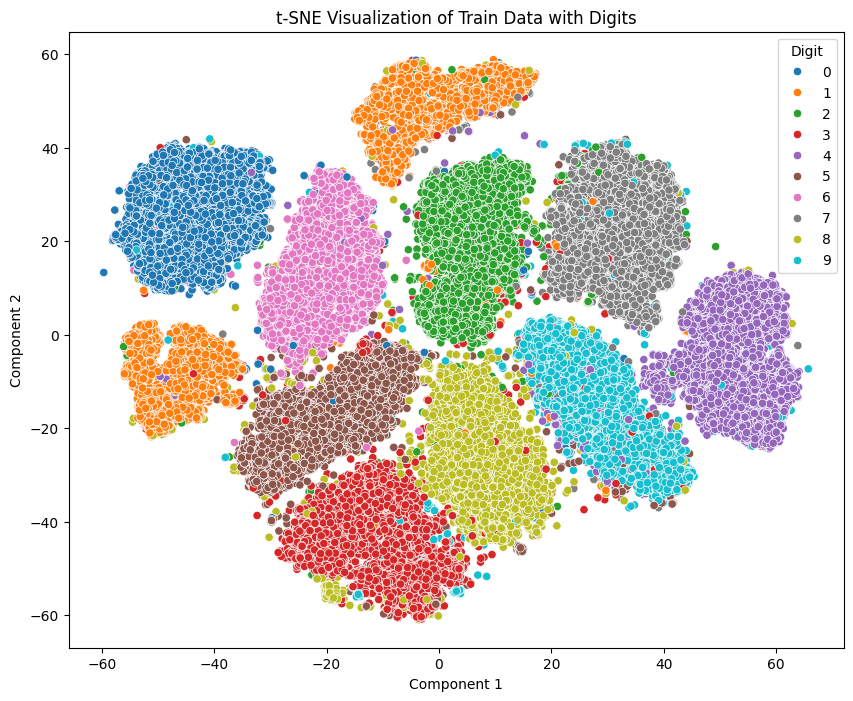

In [38]:
# Plot t-SNE embeddings with hue representing digits
plt.figure(figsize=(10, 8))
sns.scatterplot(x='component1', y='component2', hue='label', palette='tab10', data=tsne_trainviz_df)
plt.title('t-SNE Visualization of Train Data with Digits')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(title='Digit')
plt.show()

In [39]:
tsne_dt = DecisionTreeClassifier(max_depth=10, random_state=42)
tsne_dt.fit(tsne_train, y_train)
tsne_dt_pred = tsne_dt.predict(tsne_test)

# Calculate accuracy
tsne_dt_acc = accuracy_score(y_test, tsne_dt_pred)
print("Accuracy:", tsne_dt_acc)

Accuracy: 0.9667


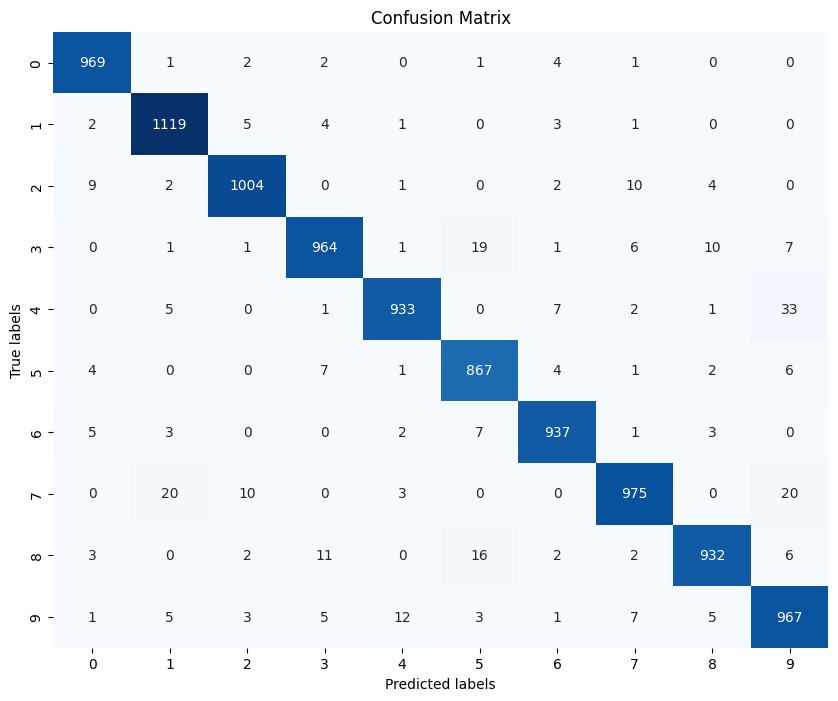

In [40]:
tsne_dt_cm = cm_viz(y_test, tsne_dt_pred)

In [41]:
tsne_dt_cr = classification_report(y_test, tsne_dt_pred)
print(tsne_dt_cr)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.97      0.99      0.98      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.95      0.96      1010
           4       0.98      0.95      0.96       982
           5       0.95      0.97      0.96       892
           6       0.98      0.98      0.98       958
           7       0.97      0.95      0.96      1028
           8       0.97      0.96      0.97       974
           9       0.93      0.96      0.94      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



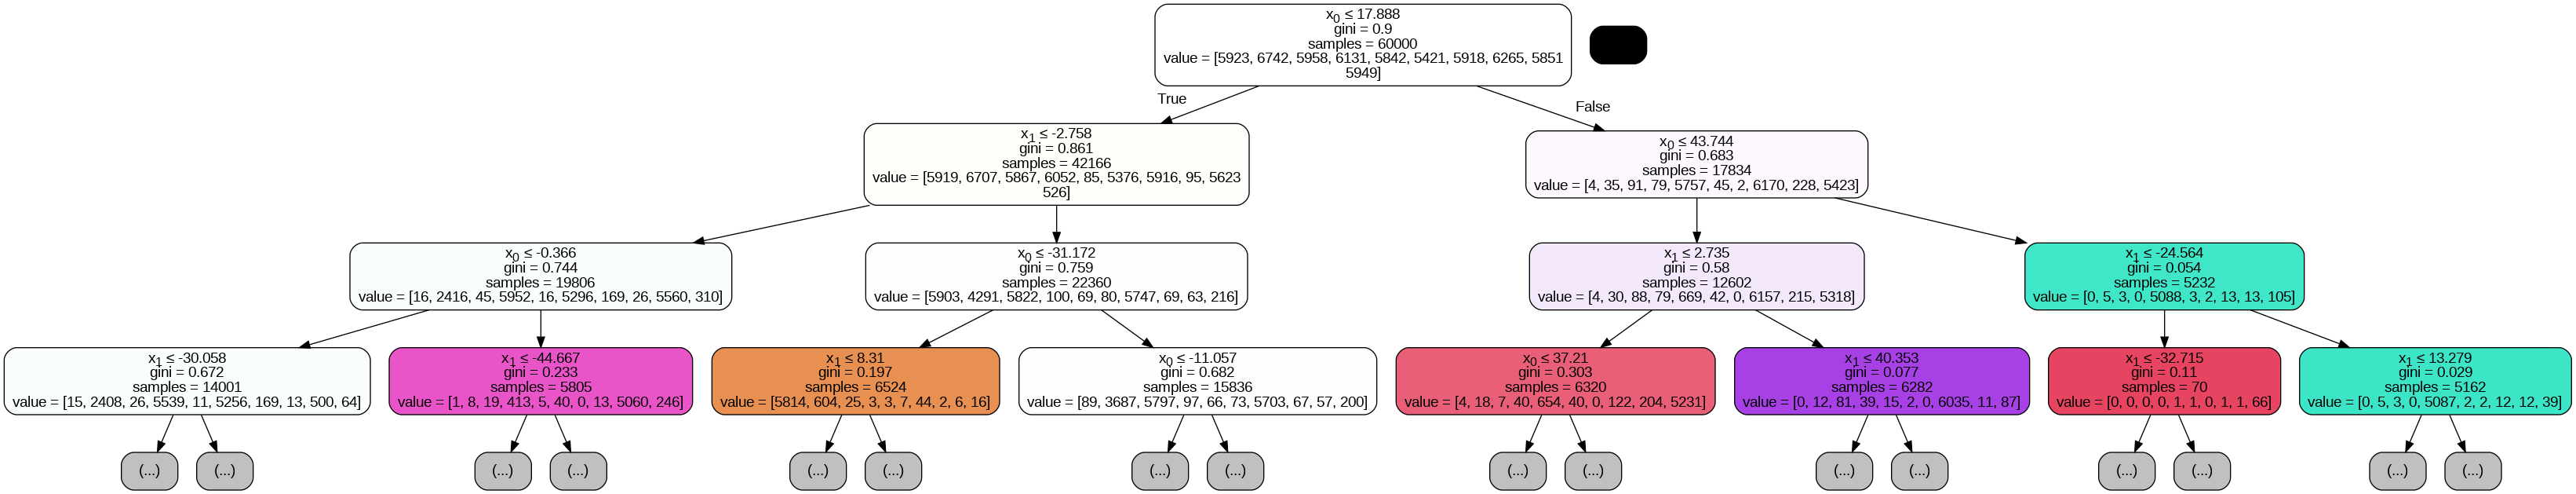

In [42]:
from io import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

# Convert Decision Tree to visualization
dot_data = StringIO()
export_graphviz(tsne_dt, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                max_depth=3)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Create PNG file
Image(graph.create_png())

### KNN Classifier

- Implemented via GPU as CPU took far too long.

In [ ]:
# CPU Implementation - TOOK 200 MINUTES FOR JUST TWO KNN MODELS.
# from sklearn.neighbors import KNeighborsClassifier
# import pandas as pd

# # Step 4: Create a KNN model
# knn = KNeighborsClassifier()

# # Step 5: Perform hyperparameter tuning using GridSearchCV
# knn_pg = {
#     'n_neighbors': range(98, 100, 2),
#     'weights': ['uniform', 'distance'],
#     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
#     'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
# }  # Hyperparameter grid

# knn_gs = GridSearchCV(knn, knn_pg, cv=5, verbose=10, n_jobs=-1)
# knn_gs.fit(X_train, y_train)

# # Get the best hyperparameters
# knn_bp = knn_gs.best_params_

# # Step 6: Evaluate the model on the testing set
# knn_bm = knn_gs.best_estimator_
# knn_acc = knn_gs.score(X_test, y_test)

# knn_gs_res = pd.DataFrame(knn_gs.cv_results_)
# knn_gs_res = knn_gs_res.sort_values(by='rank_test_score')

# knn_gs_res.head(1)

In [43]:
from cuml.neighbors import KNeighborsClassifier

best_accuracy = 0
best_step = 0
best_knn_model = None
best_knn_pred = None
accuracies = {}

# Loop through steps (n_neighbors) from 1 to 100 with a step of 2
for step in range(1, 101, 2):
    # Initialize KNN model with current step as n_neighbors
    knn_model = KNeighborsClassifier(n_neighbors=step)

    # Fit the model to the training data
    knn_model.fit(X_train_cudf, y_train_cudf)

    # Predict labels for test data
    y_pred = knn_model.predict(X_test_cudf)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred.to_numpy())

    # Store accuracy for current step
    accuracies[step] = accuracy

    # Update best accuracy and step if current accuracy is higher
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_step = step
        best_knn_model = knn_model
        best_knn_pred = y_pred

print("Best Step:", best_step)
print("Best Accuracy:", best_accuracy)

Best Step: 3
Best Accuracy: 0.9705


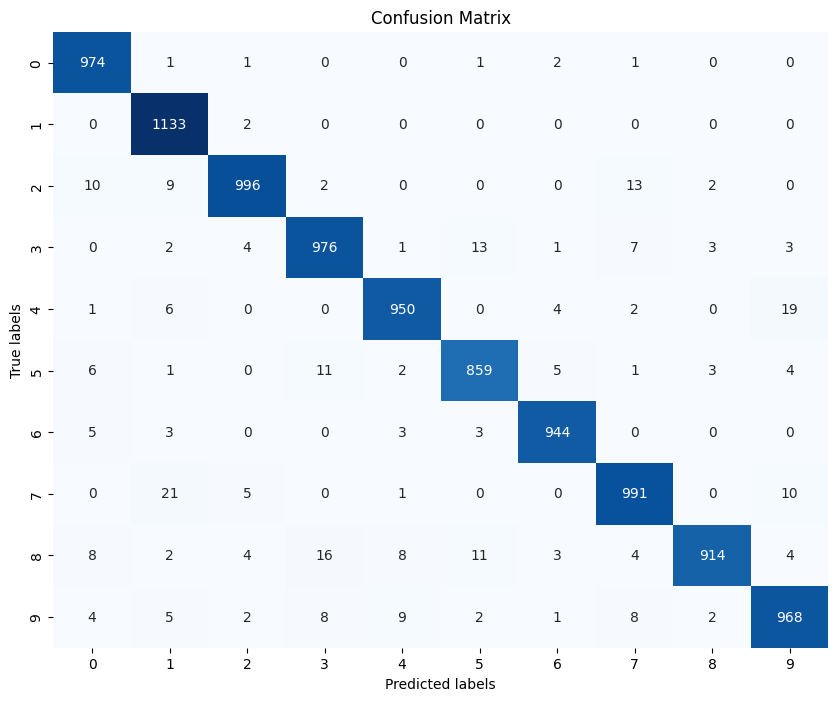

In [44]:
knn_cm = cm_viz(y_test, best_knn_pred.to_numpy())

In [45]:
knn_cr = classification_report(y_test, best_knn_pred.to_numpy())
print(knn_cr)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      1.00      0.98      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



### Support Vector Machine (SVM) Classification Model

- Also GPU accelerated, however RAPIDSAI implementation has been known to perform poorly on sparse datasets: See Known Limitations Here

[Medium Article from RAPIDSAI for SVM Implementation](https://medium.com/rapids-ai/fast-support-vector-classification-with-rapids-cuml-6e49f4a7d89e)

- As such going to attempt ThunderSVM with GPU Acceleration (FAILED)
Could not find some cuda shared object C file and this was not able to be resolved.

In [16]:
from cuml import SVC

svm_clf = SVC(kernel='rbf', C=1.0, gamma='auto')
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
print(svm_acc)

0.9443


In [18]:
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
print(svm_acc)

[W] [03:08:16.027155] SVC with the linear kernel can be much faster using the specialized solver provided by LinearSVC. Consider switching to LinearSVC if tranining takes too long.
0.94


In [19]:
svm_clf = SVC(kernel='poly')
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
print(svm_acc)

0.9774


In [20]:
svm_clf = SVC(kernel='sigmoid')
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
print(svm_acc)

0.7772


The hypertuning was done on a A100 GPU Environment as I ended up running out of GPU and System RAM.

In [17]:
from cuml import SVC
from cuml.metrics.accuracy import accuracy_score
from cuml.model_selection import GridSearchCV
import numpy as np

# Define the parameter grid to search
param_grid = {'C': [0.1, 1, 5, 10],
              'kernel': ['rbf', 'poly', 'linear']}

# Create an instance of the SVM classifier
svm_clf = SVC()

# Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=svm_clf, param_grid=param_grid, verbose=10)

# Fit the GridSearchCV instance to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters found by GridSearchCV
best_params = grid_search.best_params_

# Use the best parameters to create a new SVM classifier
best_svm_clf = SVC(**best_params)

# Fit the new classifier to the training data
best_svm_clf.fit(X_train, y_train)

# Make predictions on the test data
svm_pred = best_svm_clf.predict(X_test)

# Calculate accuracy
svm_acc = accuracy_score(y_test, svm_pred)

print("Best Parameters:", best_params)
print("Accuracy:", svm_acc)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START C=0.1, kernel=rbf..........................................


/usr/local/lib/python3.10/dist-packages/cupy/cuda/compiler.py:233: PerformanceWarning: Jitify is performing a one-time only warm-up to populate the persistent cache, this may take a few seconds and will be improved in a future release...
  jitify._init_module()


[CV 1/5; 1/12] END ...........C=0.1, kernel=rbf;, score=0.956 total time=  57.8s
[CV 2/5; 1/12] START C=0.1, kernel=rbf..........................................
[CV 2/5; 1/12] END ...........C=0.1, kernel=rbf;, score=0.957 total time=   7.5s
[CV 3/5; 1/12] START C=0.1, kernel=rbf..........................................
[CV 3/5; 1/12] END ...........C=0.1, kernel=rbf;, score=0.952 total time=   7.4s
[CV 4/5; 1/12] START C=0.1, kernel=rbf..........................................
[CV 4/5; 1/12] END ...........C=0.1, kernel=rbf;, score=0.953 total time=   7.5s
[CV 5/5; 1/12] START C=0.1, kernel=rbf..........................................
[CV 5/5; 1/12] END ...........C=0.1, kernel=rbf;, score=0.956 total time=   7.9s
[CV 1/5; 2/12] START C=0.1, kernel=poly.........................................
[CV 1/5; 2/12] END ..........C=0.1, kernel=poly;, score=0.954 total time=   7.5s
[CV 2/5; 2/12] START C=0.1, kernel=poly.........................................
[CV 2/5; 2/12] END .........

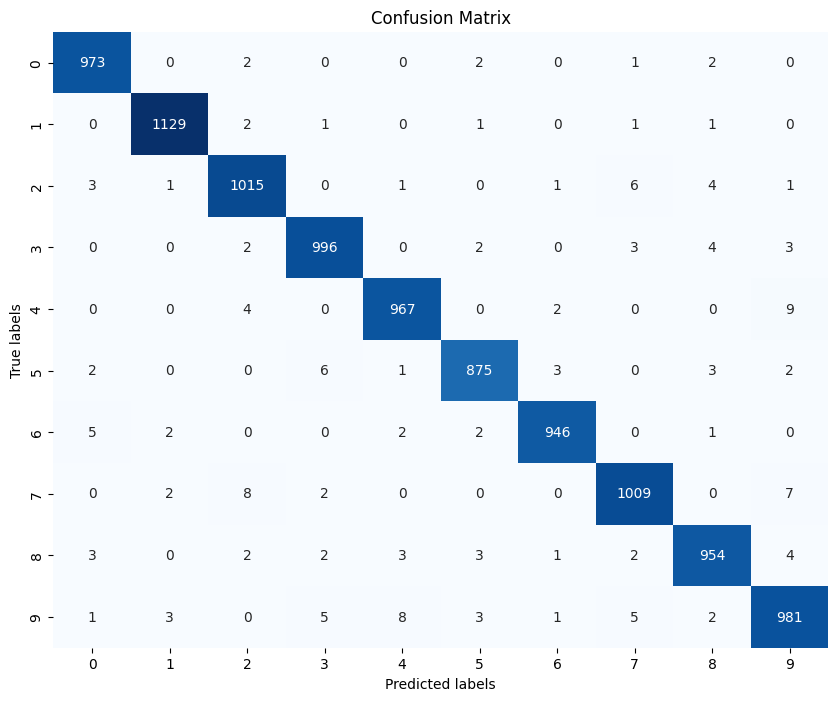

In [18]:
svm_cm = cm_viz(y_test, svm_pred)

In [19]:
svm_cr = classification_report(y_test, svm_pred)
print(svm_cr)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

